In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,day_of_year
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50,2000,2,48
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00,2000,5,132
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00,2000,9,255
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00,2000,12,348
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00,2001,3,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85,2020,10,280
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95,2020,10,301
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17,2020,12,338
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49,2021,1,12


In [5]:
df['is_spring'] = df['month'].isin([3, 4, 5]).astype(int)
df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,day_of_year,is_spring,is_summer
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50,2000,2,48,0,0
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00,2000,5,132,1,0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00,2000,9,255,0,0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00,2000,12,348,0,0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00,2001,3,61,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85,2020,10,280,0,0
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95,2020,10,301,0,0
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17,2020,12,338,0,0
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49,2021,1,12,0,0


In [6]:
# Define features and targets
features = ['id', 'year', 'month', 'day_of_year', 'is_spring', 'is_summer']
targets = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[targets] = imputer.fit_transform(df[targets])

# Create lag features (3-month lag)
df = df.sort_values(['id', 'date'])
for target in targets:
    df[f'{target}_lag3'] = df.groupby('id')[target].shift(3)

# Drop initial rows with missing lag values
df = df.dropna(subset=[f'{t}_lag3' for t in targets])

# Prepare final dataset
X = df[features + [f'{t}_lag3' for t in targets]]
y = df[targets]
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,...,is_summer,NH4_lag3,BSK5_lag3,Suspended_lag3,O2_lag3,NO3_lag3,NO2_lag3,SO4_lag3,PO4_lag3,CL_lag3
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,...,0,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,...,0,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
5,1,2001-06-07,0.020,4.02,34.0,10.61,11.80,0.016,287.00,0.208,...,1,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
6,1,2001-09-10,0.863,3.91,147.0,10.96,20.50,0.284,595.20,0.674,...,0,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
7,1,2001-11-06,0.060,2.97,71.2,13.47,25.80,0.095,314.00,0.390,...,0,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,...,0,0.045,3.88,4.8,11.27,1.21,0.018,121.12,0.398,62.79
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,...,0,0.104,5.10,0.0,11.74,0.40,0.025,128.00,0.493,69.84
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,...,0,0.000,4.70,0.0,11.33,0.00,0.013,160.64,1.214,73.37
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,...,0,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85


In [7]:
# drop the missing values - dropna()
df = df.dropna(subset=targets)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,...,is_summer,NH4_lag3,BSK5_lag3,Suspended_lag3,O2_lag3,NO3_lag3,NO2_lag3,SO4_lag3,PO4_lag3,CL_lag3
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,...,0,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,...,0,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
5,1,2001-06-07,0.020,4.02,34.0,10.61,11.80,0.016,287.0,0.208,...,1,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
6,1,2001-09-10,0.863,3.91,147.0,10.96,20.50,0.284,595.2,0.674,...,0,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
7,1,2001-11-06,0.060,2.97,71.2,13.47,25.80,0.095,314.0,0.390,...,0,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [8]:
df.isnull().sum()

id                0
date              0
NH4               0
BSK5              0
Suspended         0
O2                0
NO3               0
NO2               0
SO4               0
PO4               0
CL                0
year              0
month             0
day_of_year       0
is_spring         0
is_summer         0
NH4_lag3          0
BSK5_lag3         0
Suspended_lag3    0
O2_lag3           0
NO3_lag3          0
NO2_lag3          0
SO4_lag3          0
PO4_lag3          0
CL_lag3           0
dtype: int64

In [9]:
# Feature and target selection - Feature - independent variable and Target dependent variable
X = df[['id', 'year']]
y = df[targets]

In [10]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [12]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [13]:
y_pred = model.predict(X_test)

In [14]:
print("Model Performance on the Test Data:")
for i, target in enumerate(targets):
    print(f'{target}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
NH4:
   MSE: 1.2449337292724452
   R2: 0.8105222527111917

BSK5:
   MSE: 8.853627909916183
   R2: 0.15488329248046606

Suspended:
   MSE: 179.29857260403568
   R2: -0.106427738348853

O2:
   MSE: 18.655700739519116
   R2: -0.6267713281036149

NO3:
   MSE: 32.71012897785389
   R2: 0.32790580242510836

NO2:
   MSE: 21.415176292187432
   R2: -33.729931501590485

SO4:
   MSE: 18929.01694529405
   R2: -2.7196991850023418

PO4:
   MSE: 0.4218122907433062
   R2: -0.2796570277700481

CL:
   MSE: 71740.01932472037
   R2: 0.6186747427693108



In [15]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_targets = model.predict(input_encoded)[0]

print(f"\nPredicted target levels for station '{station_id}' in {year_input}:")
for p, val in zip(targets, predicted_targets):
    print(f"  {p}: {val:.2f}")


Predicted target levels for station '22' in 2024:
  NH4: 0.00
  BSK5: 1.99
  Suspended: 0.74
  O2: 14.22
  NO3: 5.24
  NO2: 0.04
  SO4: 130.32
  PO4: 0.49
  CL: 65.19


In [16]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
# Example: Plot of pH over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['pH'], label='pH', color='blue')
plt.title('pH Levels Over Time')
plt.xlabel('Date')
plt.ylabel('pH')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'pH'

<Figure size 1200x600 with 0 Axes>

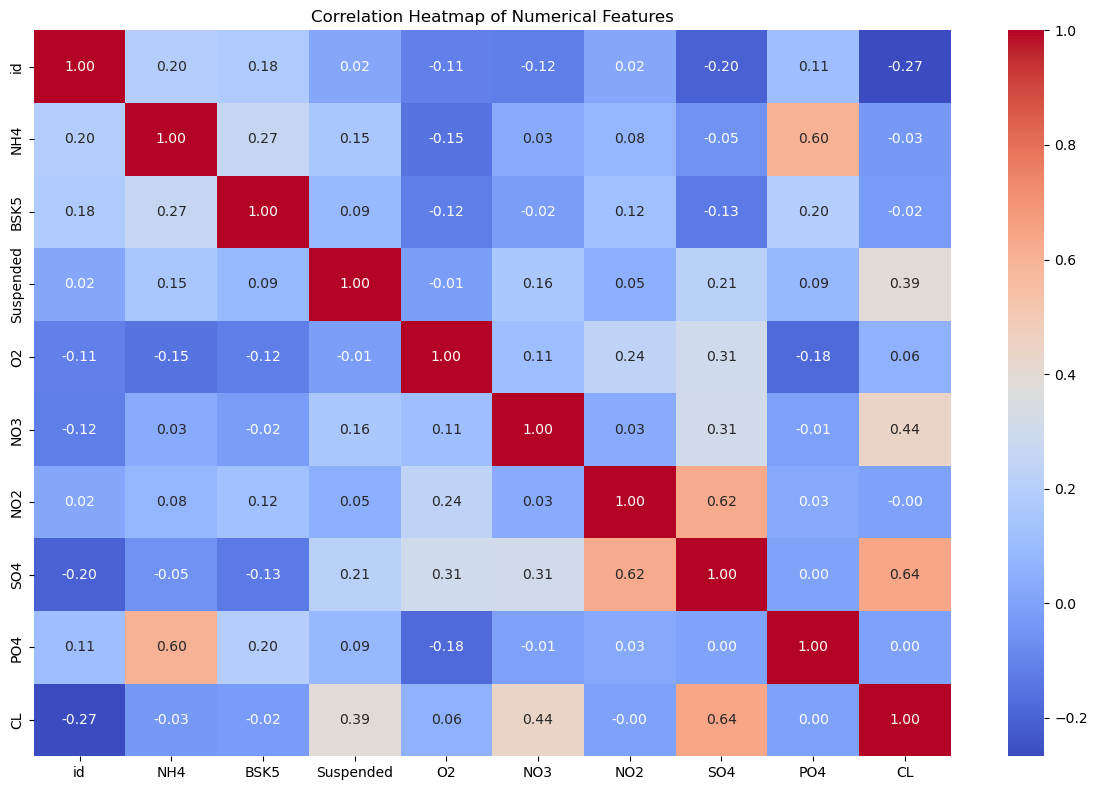

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()
df

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['is_spring'] = df['month'].isin([3, 4, 5]).astype(int)
df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,day_of_year,is_spring,is_summer
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50,2000,2,48,0,0
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00,2000,5,132,1,0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00,2000,9,255,0,0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00,2000,12,348,0,0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00,2001,3,61,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85,2020,10,280,0,0
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95,2020,10,301,0,0
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17,2020,12,338,0,0
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49,2021,1,12,0,0
